In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [2]:
from autumn.tools.runs import ManagedRun

from autumn.tools.runs.calibration.utils import get_posteriors
from autumn.tools.utils.pandas import pdfilt

In [3]:
#run_id = "covid_19/victoria/1630409372/1cbdde5"
#run_id = "covid_19/malaysia/1630499991/66b9a81"
run_id = "covid_19/victoria/1630616144/d8164de"

In [4]:
mr = ManagedRun(run_id)

In [5]:
mcmc_runs = mr.calibration.get_mcmc_runs()
mcmc_params = mr.calibration.get_mcmc_params()

In [9]:
# Burn 500 runs (from every chain), and filter by accept only
filt_idx = pdfilt(mcmc_runs, ['accept==1','run >= 8000']).index

In [10]:
# These are the params filtered by the above
pset = mcmc_params.loc[filt_idx]

In [11]:
parameters = list(pset.columns)

In [12]:
pset = get_posteriors(mcmc_params, mcmc_runs, 500)

In [13]:
def fit(data, dist_name, plot=True):
    dist = getattr(stats.distributions, dist_name)
    dist_params = dist.fit(data)
    xrange = np.linspace(data.min(),data.max(), 200)
    
    if plot:
        data.hist(density=True,bins=50)
        pdf = pd.Series([(dist.pdf(x, *dist_params)) for x in xrange], index=xrange)
        pdf.plot()
    
    return dist_params

In [92]:
param_name = "sojourn.compartment_periods.icu_early"
data = pset.loc[:, param_name]

(13.189283389438017, 3.267836334270357)

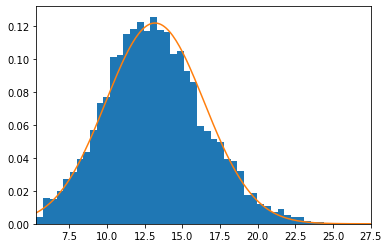

In [93]:
fit(data, 'norm')

(8.471668682399137, 18.41660070960731, 1.476221045640271, 37.175463545006664)

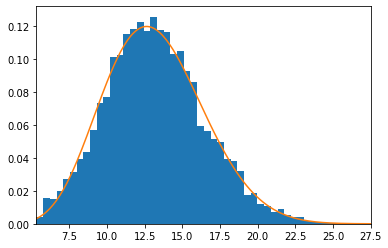

In [94]:
fit(data, 'beta')

(0.005097283966437761, 0.04484184883556176)

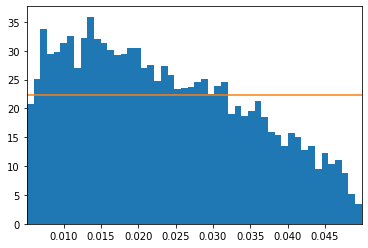

In [91]:
fit(data,'uniform')